# Spatial distribution of GL90 vertical viscosity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

In [2]:
from yamlparser import YAMLParser, read_parameterized_runs

In [3]:
yp = YAMLParser()

In [4]:
## read parameterized runs
exps_param = yp.read('/glade/u/home/noraloose/GL90paper/config_param.yaml')
%time exps_param = read_parameterized_runs(exps_param)

nw2_0.5deg_N15_KHTH800
nw2_0.5deg_N15_KHGL800_hbbl5
nw2_0.5deg_N15_KHTH800_vary
nw2_0.5deg_N15_KHGL800_vary_hbbl5
nw2_0.5deg_N15_EBT_KHTH800
nw2_0.5deg_N15_EBT_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300
nw2_0.25deg_N15_KHGL300_hbbl1
nw2_0.25deg_N15_KHGL300_hbbl5
nw2_0.25deg_N15_KHGL300_hbbl20
nw2_0.25deg_N15_KHGL300
nw2_0.25deg_N15_KHTH800
nw2_0.25deg_N15_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300_vary
nw2_0.25deg_N15_KHGL300_vary_hbbl5
nw2_0.25deg_N15_EBT_KHTH300
nw2_0.25deg_N15_EBT_KHGL300_hbbl5
nw2_0.125deg_N15_KHTH100
nw2_0.125deg_N15_KHGL100_hbbl5
nw2_0.125deg_N15_KHTH800
nw2_0.125deg_N15_KHGL800_hbbl5
nw2_0.125deg_N15_KHTH100_vary
nw2_0.125deg_N15_KHGL100_vary_hbbl5
nw2_0.125deg_N15_EBT_KHTH100
nw2_0.125deg_N15_EBT_KHGL100_hbbl5
CPU times: user 16.1 s, sys: 19.1 s, total: 35.2 s
Wall time: 5min 33s


In [5]:
for exp, v in exps_param.items():
    ds = v['ds']
    dst = ds.mean(dim='time', keep_attrs=True)
    v['dst'] = dst

## Vertical viscosity sections

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 12}
pylab.rcParams.update(params)

In [7]:
from matplotlib import cm
cmap_p = cm.get_cmap('Greens', 6)
import matplotlib as mpl

In [8]:
vmin = 0.0001
vmax = 100

def plot_Kv_meridional(vlist, abclist, lon):

    name = 'Kv_gl90_v'
    direction = 'v'

    fig, axs = plt.subplots(2, 3, figsize=(13, 8))

    for ax, v, abc in zip(axs.flatten(), vlist, abclist):
        if len(v) > 0:            
            dst = v['dst']
            st = v['st']
            label = v['label']
            grid = v['grid']
        
            e = dst.e.compute()
            eta_y = grid.interp(e, 'Y', boundary='fill').fillna(value=0).compute()

            if direction == 'u':
                fld_plot = dst[name].sel(xq=lon, method="nearest").compute() 
            else:
                fld_plot = dst[name].sel(xh=lon, method="nearest").compute()

            for i in range(16):
                ax.plot(dst.yh, e.isel(zi=i).sel(xh=lon, method="nearest"), linewidth=2, color='k')

                p = ax.pcolormesh(
                    dst.yq, eta_y.sel(xh=lon, method="nearest"), fld_plot,
                    vmin=vmin, vmax=vmax,
                    norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax),
                    cmap=cmap_p,
                )
            ax.set_title('%s %s' %(abc, label))
            
            ax.set_yticks(np.arange(-4000, 1, 1000))
            ax.set_yticklabels(np.arange(4000, -1, -1000))
            ax.set_xticks([-60, -30, 0, 30, 60])
            ax.set_xticklabels([r'60$^\circ$S', r'30$^\circ$S', r'0$^\circ$', r'30$^\circ$N', r'60$^\circ$N'])
            ax.set(xlabel=r'Latitude')

    for ax in [axs[0,1], axs[0,2], axs[1,2]]:
        ax.set_yticklabels([])

    axs[0,0].set(ylabel='Depth (m)')
    axs[1,1].set(ylabel='Depth (m)')

    axs[1,0].axis('off')        

    plt.subplots_adjust(wspace=0.2, hspace=0.4)  

    # colorbar
    fig.subplots_adjust(left=0.1, bottom=0.03)
    cax = fig.add_axes([0.1, -0.1, 0.8, 0.04])
    cb = fig.colorbar(p, cax=cax,extend='both', orientation='horizontal')
    cb.ax.tick_params(labelsize=14)
    cb.set_label(label=r'm$^2$ s$^{-1}$',size=14, labelpad=20)


    return fig

### Clean up labels

In [10]:
v = exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800'
v = exps_param['nw2_0.25deg_N15_KHGL300_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300'
v = exps_param['nw2_0.25deg_N15_KHGL800_hbbl5']
v['label'] = r'1/4$^\circ$ GL 800'
v = exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100'
v = exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']
v['label'] = r'1/8$^\circ$ GL 800'

In [14]:
exps = [
    exps_param['nw2_0.5deg_N15_KHGL800_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHGL800_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHGL800_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHGL300_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']
]

In [15]:
namelist = ['Kv_gl90_v']
for v in exps:
    dst = v['dst']
    with ProgressBar():
        for name in namelist:
            if name in dst:
                dst[name].load()
            if 'e' in dst:
                dst['e'].load()

[########################################] | 100% Completed | 25.7s
[########################################] | 100% Completed | 28.0s
[########################################] | 100% Completed |  1min 56.7s
[########################################] | 100% Completed |  2min 15.8s


## Meridional sections

In [16]:
# redefine experiment list so that we have blank subfigure
exps = [
    exps_param['nw2_0.5deg_N15_KHGL800_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHGL800_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHGL800_hbbl5'],
    '', 
    exps_param['nw2_0.25deg_N15_KHGL300_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']
]

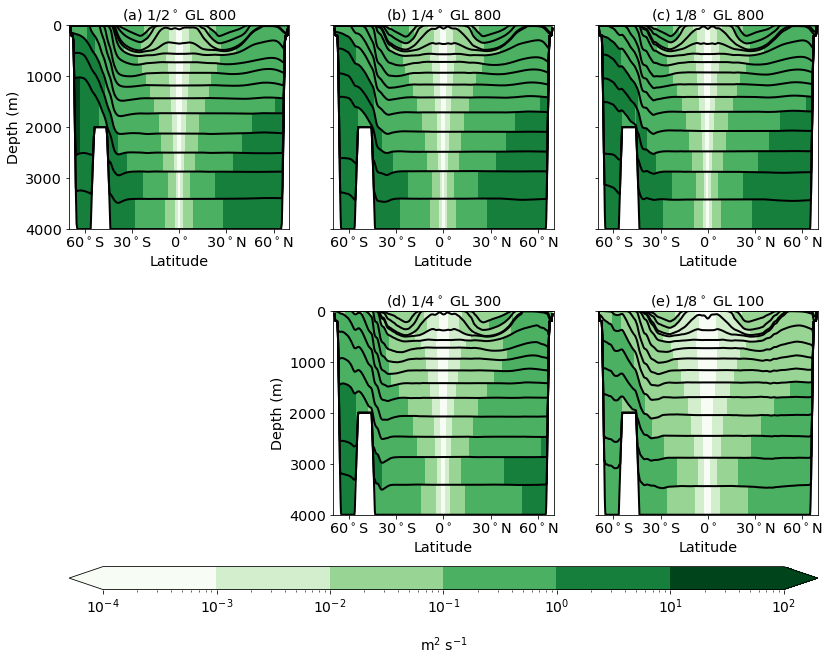

In [17]:
# at 10E
lon = 10
fig = plot_Kv_meridional(exps, ['(a)', '(b)', '(c)', '', '(d)', '(e)'], lon)
figname = '/glade/u/home/noraloose/GL90paper/figures/GL90viscosity_meridional_%iE.png' %lon
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)